In [17]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, LeakyReLU

In [2]:
print(os.listdir('../yzproje2'))

['.ipynb_checkpoints', 'background_backlit_A.jpg', 'background_backlit_B.jpg', 'Base Images', 'Cropped Images', 'example_1_Cropped Image.jpg', 'example_2_Base Image.jpg', 'ImageSetKey.csv', 'Image_Count_Summary.jpg', 'Untitled.ipynb', 'YZPROJE2.ipynb']


Found 973 validated image filenames belonging to 9 classes.
Found 244 validated image filenames belonging to 9 classes.
Found 1 validated image filenames belonging to 1 classes.


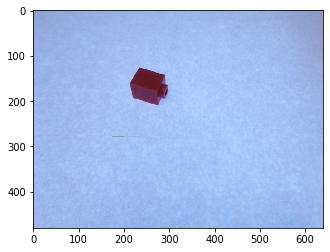

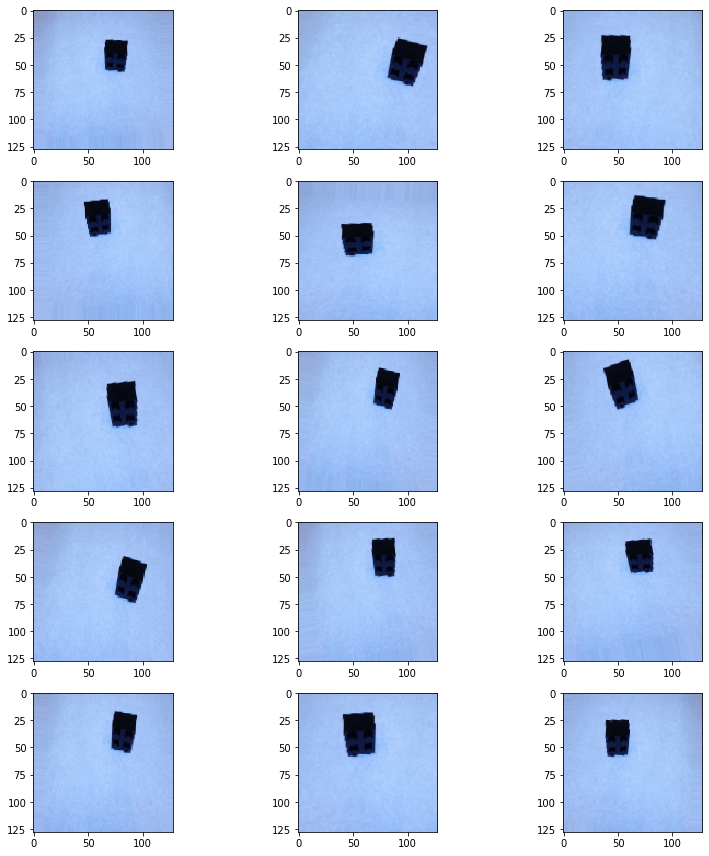

In [10]:
FAST_RUN=False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

filenames=os.listdir("Base Images")
categories=[]
data=[]

for filename in filenames:
    
    image_file=os.listdir("Base Images/"+filename)
    for file in image_file:
        path="{0}/{1}/{2}".format("Base Images",filename,file)
        categories.append(filename)
        data.append(path)

df=pd.DataFrame({"FileName":data,"Categories":categories})  
      
train_df,validate_df=train_test_split(df,test_size=0.20,random_state=42)
train_df=train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

img=load_img(df.FileName[0])
plt.imshow(img)

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,  
    x_col='FileName',
    y_col='Categories',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    x_col='FileName',
    y_col='Categories',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    x_col='FileName',
    y_col='Categories',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()



In [21]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,input_shape =(IMAGE_WIDTH,IMAGE_HEIGHT,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(32,kernel_size=3, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=3 , padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128,kernel_size=3 , padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128,kernel_size=3, padding='same', activation ='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(DepthwiseConv2D(kernel_size=3, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(Conv2D(64,kernel_size=3, padding='same', activation ='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(9, activation ='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)       

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=50,validation_data=validation_generator, validation_steps=total_validate//batch_size,steps_per_epoch=total_train//batch_size)

Epoch 1/50
64/64 [==============================] - 42s 659ms/step - loss: 0.3931 - accuracy: 0.8664 - val_loss: 7.6168 - val_accuracy: 0.2542
Epoch 2/50
64/64 [==============================] - 25s 396ms/step - loss: 0.3567 - accuracy: 0.8716 - val_loss: 76.3255 - val_accuracy: 0.1223
Epoch 3/50
64/64 [==============================] - 23s 362ms/step - loss: 0.3721 - accuracy: 0.8539 - val_loss: 1.5922 - val_accuracy: 0.5022
Epoch 4/50
64/64 [==============================] - 24s 381ms/step - loss: 0.3503 - accuracy: 0.8706 - val_loss: 4.0669 - val_accuracy: 0.3712
Epoch 5/50
64/64 [==============================] - 23s 360ms/step - loss: 0.3081 - accuracy: 0.8831 - val_loss: 7.4251 - val_accuracy: 0.3100
Epoch 6/50
64/64 [==============================] - 23s 363ms/step - loss: 0.3787 - accuracy: 0.8643 - val_loss: 3.6986 - val_accuracy: 0.3493
Epoch 7/50
64/64 [==============================] - 23s 353ms/step - loss: 0.3131 - accuracy: 0.8841 - val_loss: 16.1537 - val_accuracy: 0.13